# EDA on Udemy Courses

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This Dataset contains Udemy courses for all subjects. It has 12 Columns and 3683 Rows.

In [2]:
df=pd.read_csv("C:\\Users\\abc\\Downloads\\Pandas Datasets\\udemy-courses\\udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


This show the type of data of every columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null object
price                  3683 non-null object
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null int64
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3683 non-null object
subject                3683 non-null object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


Below is the information on number of unique overvation of every columns

In [4]:
df.nunique()

course_id              3677
course_title           3668
url                    3677
is_paid                   5
price                    39
num_subscribers        2198
num_reviews             511
num_lectures            229
level                     5
content_duration        110
published_timestamp    3677
subject                   4
dtype: int64

Below information show how many null values are present in the columns.

In [5]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Checking unique observations in "is_paid" columns.

In [6]:
print("Number of nunique observation in 'is_paid' column are ",df['is_paid'].nunique(),'.')
print(df['is_paid'].unique())

Number of nunique observation in 'is_paid' column are  5 .
['True' 'False' 'FALSE' 'TRUE'
 'https://www.udemy.com/learnguitartoworship/']


Converting the obsevation to lower case. so that I can change the information in binary type.

In [7]:
df['is_paid']=df['is_paid'].map(lambda x: x.lower())

In [8]:
df['is_paid']=df['is_paid'].replace({"true":1,"false":0})

Now I will check and correct the obsevation ("https://www.udemy.com/learnguitartoworship/") of "is_paid" column.

In [9]:
df[df['is_paid']=='https://www.udemy.com/learnguitartoworship/']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments


Here is problem is the data is filled under wrong columns. For example "url" data is updated under "is_paid" column. So I will correct this row.

In [10]:
df.iloc[2066][2:]

url                                                          000!"
is_paid                https://www.udemy.com/learnguitartoworship/
price                                                         TRUE
num_subscribers                                                 30
num_reviews                                                   1463
num_lectures                                                    29
level                                                           52
content_duration                                    Beginner Level
published_timestamp                                        3 hours
subject                                        Musical Instruments
Name: 2066, dtype: object

In [11]:
for i in range(2,11):
    df.iloc[2066,i]=df.iloc[2066,i+1]

In [21]:
#df['is_paid']=df['is_paid'].replace({"TRUE":1},inplace=True)

In [23]:
df['is_paid'].unique()

array([1, 0], dtype=int64)

Now I converted "is_paid" column to binary but the data in 'published_timestamp' column got incorrectly updated as shown below. Hence converted that to Nan value.

In [33]:
df.iloc[2066]

course_id                                                          96698
course_title           Learn Classical Guitar Technique and play 'Spa...
url                          https://www.udemy.com/learnguitartoworship/
is_paid                                                                1
price                                                                 30
num_subscribers                                                     1463
num_reviews                                                           29
num_lectures                                                          52
level                                                     Beginner Level
content_duration                                                 3 hours
published_timestamp                                  Musical Instruments
subject                                              Musical Instruments
Name: 2066, dtype: object

In [38]:
df['published_timestamp'].iloc[2066]=np.NaN

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
df['published_timestamp'].iloc[2066]

nan

Converted the data type of "published_timestamp" column to Pandas Date format as below.

In [40]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null int64
price                  3683 non-null object
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null object
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3682 non-null datetime64[ns, UTC]
subject                3683 non-null object
dtypes: datetime64[ns, UTC](1), int64(4), object(7)
memory usage: 345.4+ KB


In [43]:
df['published_timestamp']=df['published_timestamp'].dt.date

In [44]:
df['published_timestamp']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_timestamp, Length: 3683, dtype: object

In [45]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5 hours,2017-01-18,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39 hours,2017-03-09,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3 hours,2017-05-30,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2 hours,2016-12-13,Business Finance


Pie chart of Paid v/s Free Courses:

In [63]:
df['is_paid'].value_counts()

1    3373
0     310
Name: is_paid, dtype: int64

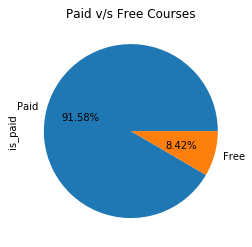

In [62]:
df['is_paid'].value_counts().plot(kind='pie', autopct='%1.2f%%', labels=("Paid","Free"))
plt.title("Paid v/s Free Courses")
plt.show()

As the data type of "price" column was in str, changed it to int.
Also the price of free courses were updated as "Free". So changed that to zero.

In [69]:
df['price']=df['price'].replace({"Free":0})

In [95]:
#df.drop('Type of Price', inplace=True, axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null int64
price                  3683 non-null int64
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null object
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3682 non-null object
subject                3683 non-null object
dtypes: int64(5), object(7)
memory usage: 345.4+ KB


Course with the highest price:

In [115]:
df[df['price']==df['price'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5 hours,2017-01-18,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2 hours,2016-12-13,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,1,200,827,14,15,All Levels,1 hour,2017-04-18,Business Finance
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,1,200,4284,93,76,All Levels,5 hours,2015-09-11,Business Finance
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-mo...,1,200,1380,42,17,All Levels,1 hour,2016-10-18,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3597,976854,Spring 4 Mastercourse: Covers Annotation & XML...,https://www.udemy.com/java-spring-framework/,1,200,1353,53,320,Intermediate Level,23.5 hours,2016-11-01,Web Development
3625,1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,1,200,50,5,60,Beginner Level,5 hours,2017-05-29,Web Development
3647,709324,Learn Web Development by Creating a Social Net...,https://www.udemy.com/meteor-tutorial/,1,200,442,48,80,Beginner Level,6.5 hours,2015-12-30,Web Development
3657,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,1,200,279,37,119,All Levels,10 hours,2017-04-25,Web Development


Course with the highest number of subscribers:

In [119]:
df[df['num_subscribers']==df['num_subscribers'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2832,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,0,268923,8629,45,All Levels,10.5 hours,2013-02-14,Web Development


Pie chart of level of courses:

In [122]:
df['level'].value_counts()

All Levels            1932
Beginner Level        1272
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

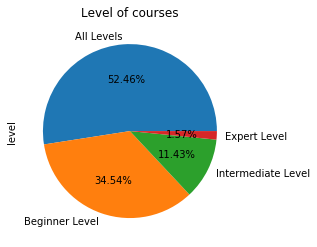

In [129]:
df['level'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Level of courses")
plt.show()

Pie chart of Subjects of courses:

In [144]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

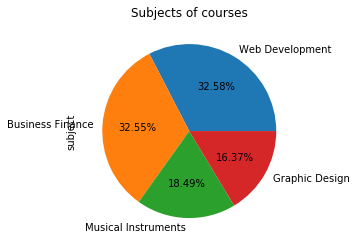

In [147]:
df['subject'].value_counts().plot(kind="pie", autopct='%1.2f%%')
plt.title("Subjects of courses")
plt.show()

By looking at the above pie chart, it can be said that the "Web Development" and "Business Finance" are the subjects with the most number of courses.

In [148]:
df.groupby(["is_paid"])['subject'].value_counts()

is_paid  subject            
0        Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
1        Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: subject, dtype: int64

<Figure size 7200x5760 with 0 Axes>

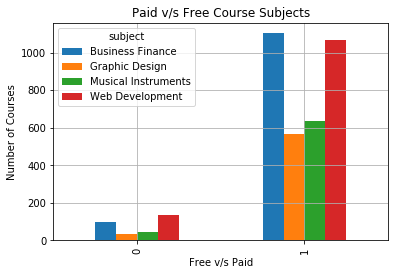

In [161]:
plt.figure(figsize=(100,80))
df.groupby(["is_paid"])['subject'].value_counts().unstack().plot(kind='bar')
plt.grid()
plt.title("Paid v/s Free Course Subjects")
plt.xlabel("Free v/s Paid") 
plt.ylabel("Number of Courses")
plt.show()

Below is the paid course on subject "Business Finance" with the highest number of subscribers:

In [181]:
df[(df['is_paid']==1) & (df['subject']=="Business Finance")]['num_subscribers'].idxmax()

494

In [187]:
df.iloc[df[(df['is_paid']==1) & (df['subject']=="Business Finance")]['num_subscribers'].idxmax()]

course_id                                                          49798
course_title           Bitcoin or How I Learned to Stop Worrying and ...
url                    https://www.udemy.com/bitcoin-or-how-i-learned...
is_paid                                                                1
price                                                                  0
num_subscribers                                                    65576
num_reviews                                                          936
num_lectures                                                          24
level                                                         All Levels
content_duration                                                 8 hours
published_timestamp                                           2013-04-20
subject                                                 Business Finance
Name: 494, dtype: object

Below is the paid course on subject "Web Development" with the highest number of subscribers:

In [183]:
df[(df['is_paid']==1) & (df['subject']=="Web Development")]['num_subscribers'].idxmax()

2832

In [188]:
df.iloc[df[(df['is_paid']==1) & (df['subject']=="Web Development")]['num_subscribers'].idxmax()]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                                1
price                                                                  0
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                           2013-02-14
subject                                                  Web Development
Name: 2832, dtype: object